# Libraries

In [77]:
import numpy as np
from scipy import stats
from scipy.stats import norm, expon, binom, poisson

#images
from IPython.display import Image

#visualization
import seaborn as sns
sns.set_style('darkgrid')

from matplotlib import pyplot as plt
%matplotlib inline

---
# Sec 2.14 - Mean, Median, Mode

### MEAN & MEDIAN

Creating fake income data with:\
center = 27000\
sd = 15000\
10000 data point

In [2]:
np.random.seed(42)

incomes = np.random.normal(27000, 15000, 10000)
incomes

array([34450.71229517, 24926.03548243, 36715.32807151, ...,
       16420.24914126, 34436.48359523, 36665.82680307])

/Users/oz/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


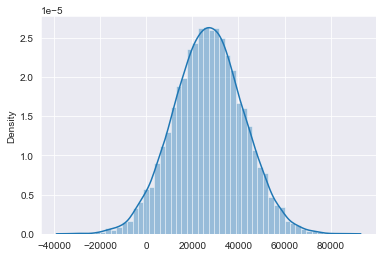

In [4]:
sns.distplot(incomes);

In [5]:
print('mean income:  ', np.mean(incomes), 
      '\nmedian income:', np.median(incomes),
      '\nmax income:   ', np.max(incomes), 
      '\nmin income:   ', np.min(incomes))

mean income:   26967.960249473606 
median income: 26961.075363106836 
max income:    85893.56559654491 
min income:    -31836.003774275137


Let's compare the above to when we add someone with an extremely high income to the dataset ($100,000,000)\
Understand that when talking about mean, its important to know if there are any outliers.\
If there are outliers, then median might be a better statistic

In [6]:
incomes = np.append(incomes, [1000000000])
print('mean income:  ', np.mean(incomes), 
      '\nmedian income:', np.median(incomes),
      '\nmax income:   ', np.max(incomes), 
      '\nmin income:   ', np.min(incomes))

mean income:   126955.2647230013 
median income: 26963.942386217193 
max income:    1000000000.0 
min income:    -31836.003774275137


Above we can see how the median chanaged due to that one massive outlier, which isn't exactly representative of the population

### MODE

Let's create fake ages for 500 people, between 18 and 90 years old.

[48 70 51 55 74 21 19 29 52 87 89 38 78 52 65 32 88 32 23 85 39 49 39 44
 32 61 26 51 32 79 62 89 75 36 33 25 50 35 52 60 67 20 76 45 63 81 87 64
 31 24 48 68 46 32 42 78 58 86 21 74 48 20 84 67 34 77 83 41 49 36 83 77
 83 32 52 86 44 24 23 50 75 66 34 59 89 57 63 88 87 85 18 69 52 86 22 34
 70 69 31 46 25 18 46 53 68 54 86 70 69 29 69 18 24 34 60 88 34 76 20 46
 39 55 71 67 86 47 40 64 38 37 40 85 38 38 18 32 34 68 80 31 76 67 51 23
 66 23 86 24 68 18 30 60 44 88 20 75 34 62 75 73 71 46 71 44 62 48 53 78
 54 84 53 22 63 69 66 23 27 40 34 61 58 32 61 75 67 69 87 85 80 75 40 61
 61 69 84 45 84 35 44 68 77 66 32 85 32 68 65 89 18 24 70 48 35 29 65 47
 24 20 80 23 32 88 60 35 39 78 78 70 43 57 25 38 60 38 20 48 44 44 74 50
 61 60 48 82 34 32 51 21 89 45 19 34 75 26 48 83 79 36 72 45 67 82 20 69
 27 38 54 32 26 61 56 22 42 73 81 89 69 26 27 27 79 77 36 55 23 32 64 62
 22 70 83 79 40 61 69 63 36 64 69 41 34 63 81 45 67 81 45 73 76 22 71 61
 59 89 74 64 42 61 32 68 70 51 25 87 38 24 73 66 59

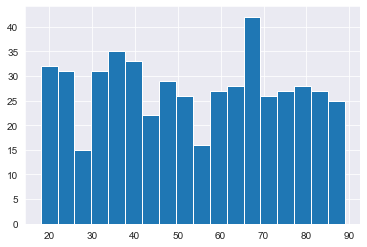

In [7]:
# np.random.seed(42)

ages = np.random.randint(18, 90, size=500)
print(ages)
plt.hist(ages, 18);

In [8]:
stats.mode(ages)

ModeResult(mode=array([32]), count=array([20]))

So in the above dataset, the age 34 appears 13 times. So the mode is 34.

---
# Sec 2.15 - Variance & Standard Deviation

### VARIANCE ($\sigma^{2}$)

Measures how spread out the dataset is.\
Average of the squared differences from the mean
- First find the mean ($\mu$)
- then find the differnces (data point - mean)
- sqare the differences
- Find average of squared diff (sum squared diff and divide by number of data points)

**This gives weight to outliers**

### STANDARD DEVIATION ($\sigma$)

Squre root of the variance\
**Helps identify outliers.** Points that lie more than one standard deviations from the mean can be considered unusual.\
Can talk about how extreme a data point is by talking about 'how many sigmas' away from the mean it is

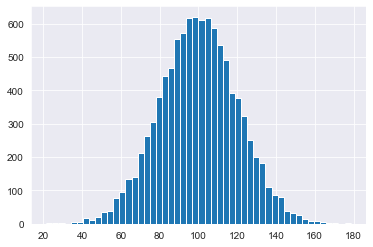

In [22]:
np.random.seed(42)

incomes_0215 = np.random.normal(100.0, 20.0, 10000) #center, sd, size

plt.hist(incomes_0215, 50); #bins

In [14]:
#STANDARD DEVIATION of numpy array. Can call functions on them

incomes_0215.std()

20.06824412259975

In [16]:
#VARIANCE of numpy array. 
#standard deviation squared

incomes_0215.var()

402.73442216425946

### SAMPLE VARIANCE (*S*$^{2}$)

If working with sample, instead of entire dataset:
- divide the sum of squared diff by **N-1** (N = number of samples)

---
# Sec 2.16 - Probabily Density/Mass Functions

### PROBABILITY DENSITY FUNCITON (pdf)

#### For **Continuous Data**

Probability of data point falling within some given range of a given value
- Between 0 & 1 sd ($\sigma$) = 68.2%
- Between 1 & 2 $\sigma$ = 27.2%
- Between 2 & 3 $\sigma$ = 4.2%
- \> 3 $\sigma$ from the mean = .2%

![Probability Distribution Function](img/probability_distribution_function_graph.png)

### PROBABILITY MASS FUNCTION (pmf)

#### For **Discrete Data**

![probability mass function](img/probability_mass_function_graph.png)

Here we say: the probabiliy of 3 occuring is 30%

It's basically a histogram.

---
# Sec 2.17 - Common Data Distributions

### UNIFORM DISTRIBUTION

Every value has almost an equal probabily of appearing

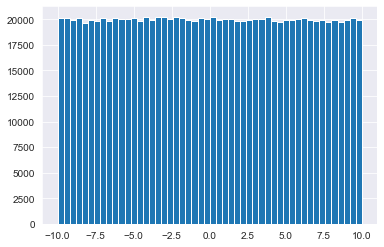

In [49]:
values_217 = np.random.uniform(-10.0,10.0, 1000000)
plt.hist(values_217, 50);

### NORMAL/GAUSSIAN

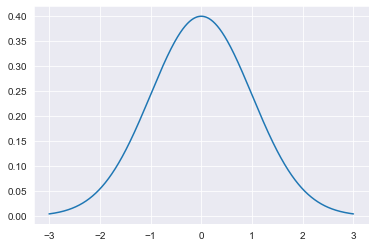

In [50]:
x = np.arange(-3, 3, 0.001) #range of values bw -3 and 3, step (or spacing) of 0.001
plt.plot(x, norm.pdf(x));

### EXPONENTIAL PDF / "POWER LAW"

Data set where you see an exponential fall off

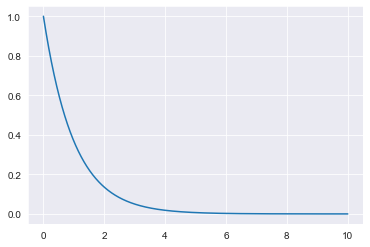

In [60]:
x = np.arange(0, 10, 0.001)
plt.plot(x, expon.pdf(x));

### BINOMIAL PROBABILITY MASS FUNCTION

Oz- Not familiar with this. I don't rmr doing this during the bootcamp. But it's in the Udemy course.

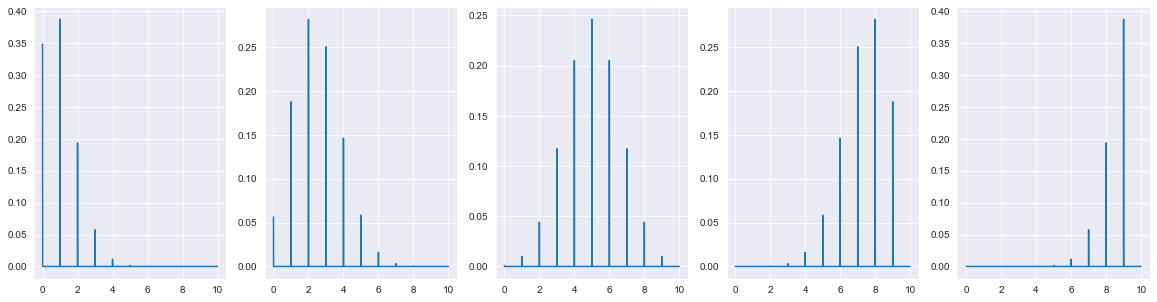

In [76]:
n, p = 10, 0.1
n, q = 10, 0.25
n, r = 10, 0.5
n, s = 10, 0.75
n, t = 10, 0.9
x = np.arange(0, 10, 0.001)

fig, ax = plt.subplots(1, 5, figsize=(20,5)) #rows, cols; figsize(len, height)
ax[0].plot(x, binom.pmf(x, n, p))
ax[1].plot(x, binom.pmf(x, n, q))
ax[2].plot(x, binom.pmf(x, n, r))
ax[3].plot(x, binom.pmf(x, n, s))
ax[4].plot(x, binom.pmf(x, n, t));

### POISSON PMF

Example: My website gets on average 500 visits per day, what's the odds of getting 550 on a given day?

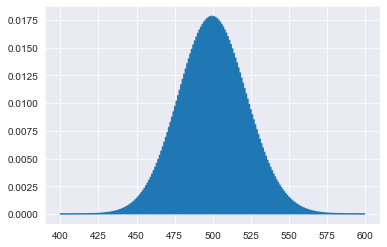

In [86]:
mu = 500 #mean
x = np.arange(400, 600, 0.5) #start, stop, step
plt.plot(x, poisson.pmf(x, mu));

In [87]:
x = poisson.pmf(550,mu)
x

0.0015115070495210661

This above doesn't make sense. So the chance of getting 550 visitors is 0.15%?? That's insane... given that the website averages 500 visits per day